https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
%matplotlib inline

/usr/local/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#Data Cleaning
#Change TotalCharges to numeric float values and drop all rows with NaN value
t = telco['TotalCharges']
telco['TotalCharges'] = pd.to_numeric(t, errors='coerce')
telco = telco.dropna()

# get dummy variables to categorical columns
telco = pd.get_dummies(telco, columns = ['Churn'])


In [4]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,1


# Data Exploration

In [5]:
telco['Churn_Yes'].value_counts()

0    5163
1    1869
Name: Churn_Yes, dtype: int64

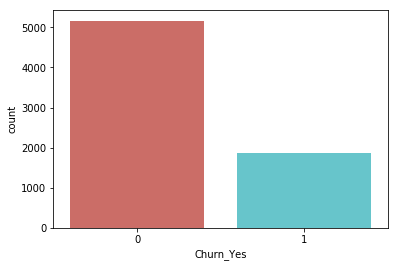

<Figure size 432x288 with 0 Axes>

In [6]:
sns.countplot(x='Churn_Yes', data=telco, palette='hls')
plt.show()
plt.savefig('count_plot')

In [7]:
#Measure Class imbalance
count_no_churn = len(telco[telco['Churn_Yes']==0])
count_churn = len(telco[telco['Churn_Yes']==1])
pct_no_churn = count_no_churn/(count_no_churn + count_churn)
pct_churn = count_churn/(count_no_churn+count_churn)
print('Percent of No-Churn = ' + str(pct_no_churn*100))
print('Percent of Churn = ' + str(pct_churn*100))

Percent of No-Churn = 73.42150170648463
Percent of Churn = 26.578498293515356


In [8]:
#Compare descriptive statistics of Churn and no Churn
telco.groupby('Churn_Yes').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_No
Churn_Yes,,,,,
0,0.128995,37.650010,61.307408,2555.344141,1
1,0.254682,17.979133,74.441332,1531.796094,0


In [9]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn_No',
       'Churn_Yes'],
      dtype='object')

In [10]:
telco.groupby('SeniorCitizen').mean()

,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
SeniorCitizen,,,,,
0,32.252292,61.885594,2181.089550,0.763497,0.236503
1,33.295972,79.820359,2810.465193,0.583187,0.416813


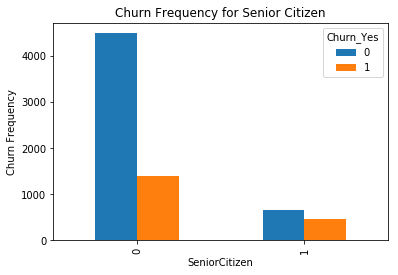

In [11]:
pd.crosstab(telco.SeniorCitizen, telco.Churn_Yes).plot(kind='bar')
plt.title('Churn Frequency for Senior Citizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Churn Frequency')
plt.savefig('churn_freq_seniorcit')

In [12]:
telco.groupby('Partner').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
Partner,,,,,,
No,0.156362,23.370706,61.956472,1584.960429,0.670239,0.329761
Yes,0.168877,42.129089,67.845977,3032.271648,0.802829,0.197171


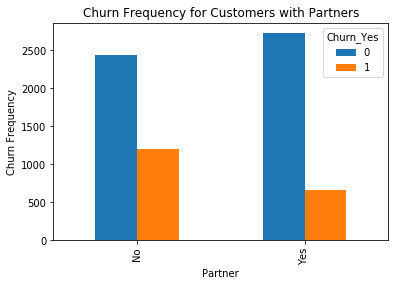

In [13]:
pd.crosstab(telco.Partner, telco.Churn_Yes).plot(kind='bar')
plt.title('Churn Frequency for Customers with Partners')
plt.xlabel('Partner')
plt.ylabel('Churn Frequency')
plt.savefig('churn_freq_partner')

In [14]:
telco.groupby('Dependents').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
Dependents,,,,,,
No,0.213055,29.806000,67.002808,2187.709254,0.687209,0.312791
Yes,0.043354,38.569319,59.617032,2507.955669,0.844688,0.155312


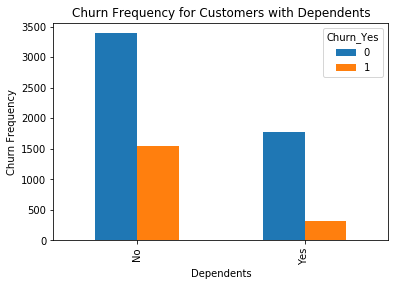

In [15]:
pd.crosstab(telco.Dependents, telco.Churn_Yes).plot(kind='bar')
plt.title('Churn Frequency for Customers with Dependents')
plt.xlabel('Dependents')
plt.ylabel('Churn Frequency')
plt.savefig('churn_freq_Dependents')

In [16]:
telco.groupby('PhoneService').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
PhoneService,,,,,,
No,0.152941,31.830882,41.992500,1500.433750,0.750000,0.250000
Yes,0.163413,32.485044,67.239625,2367.108588,0.732525,0.267475


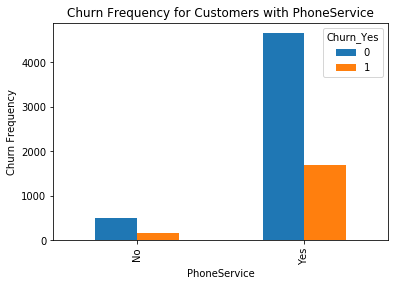

In [17]:
pd.crosstab(telco.PhoneService, telco.Churn_Yes).plot(kind='bar')
plt.title('Churn Frequency for Customers with PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Churn Frequency')
plt.savefig('churn_freq_PhoneService')

In [18]:
telco.groupby('InternetService').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
InternetService,,,,,,
DSL,0.107202,32.889487,58.088017,2119.789259,0.810017,0.189983
Fiber optic,0.268411,32.917959,91.500129,3205.304570,0.581072,0.418928
No,0.034211,30.667763,21.076283,665.220329,0.925658,0.074342


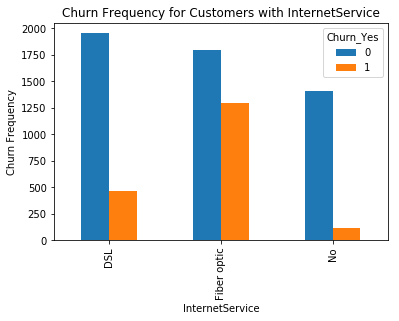

In [19]:
pd.crosstab(telco.InternetService, telco.Churn_Yes).plot(kind='bar')
plt.title('Churn Frequency for Customers with InternetService')
plt.xlabel('InternetService')
plt.ylabel('Churn Frequency')
plt.savefig('churn_freq_InternetService')

In [20]:
telco.groupby('OnlineSecurity').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
OnlineSecurity,,,,,,
No,0.231055,25.858164,75.693737,2136.277938,0.582213,0.417787
No internet service,0.034211,30.667763,21.076283,665.220329,0.925658,0.074342
Yes,0.139950,45.135980,78.870496,3759.042109,0.853598,0.146402


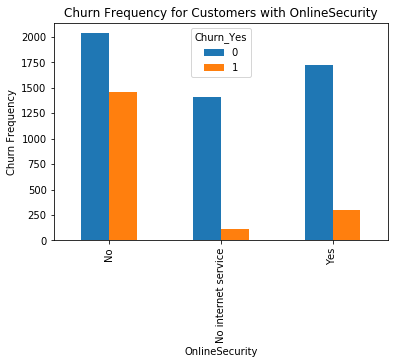

In [21]:
pd.crosstab(telco.OnlineSecurity, telco.Churn_Yes).plot(kind='bar')
plt.title('Churn Frequency for Customers with OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('Churn Frequency')
plt.savefig('churn_freq_OnlineSecurity')

In [22]:
telco.groupby('OnlineBackup').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
OnlineBackup,,,,,,
No,0.198899,23.688371,71.944282,1828.148364,0.600583,0.399417
No internet service,0.034211,30.667763,21.076283,665.220329,0.925658,0.074342
Yes,0.196289,44.638763,83.106412,3876.923629,0.784330,0.215670


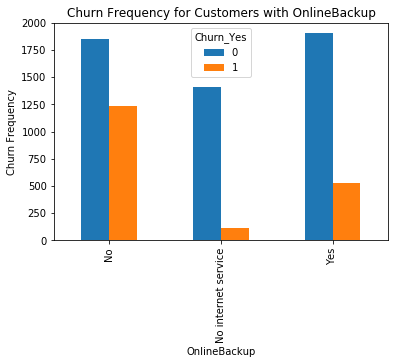

In [23]:
pd.crosstab(telco.OnlineBackup, telco.Churn_Yes).plot(kind='bar')
plt.title('Churn Frequency for Customers with OnlineBackup')
plt.xlabel('OnlineBackup')
plt.ylabel('Churn Frequency')
plt.savefig('churn_freq_OnlineBackup')

In [24]:
telco.groupby('DeviceProtection').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
DeviceProtection,,,,,,
No,0.201681,23.704590,70.603862,1798.760149,0.608597,0.391403
No internet service,0.034211,30.667763,21.076283,665.220329,0.925658,0.074342
Yes,0.192721,44.678660,84.853888,3920.459016,0.774607,0.225393


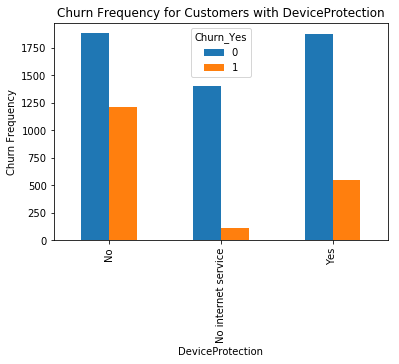

In [25]:
pd.crosstab(telco.DeviceProtection, telco.Churn_Yes).plot(kind='bar')
plt.title('Churn Frequency for Customers with DeviceProtection')
plt.xlabel('DeviceProtection')
plt.ylabel('Churn Frequency')
plt.savefig('churn_freq_DeviceProtection')

In [26]:
telco.groupby('TechSupport').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
TechSupport,,,,,,
No,0.239055,25.851671,74.584879,2089.886679,0.583525,0.416475
No internet service,0.034211,30.667763,21.076283,665.220329,0.925658,0.074342
Yes,0.127451,44.910784,80.718799,3818.111397,0.848039,0.151961


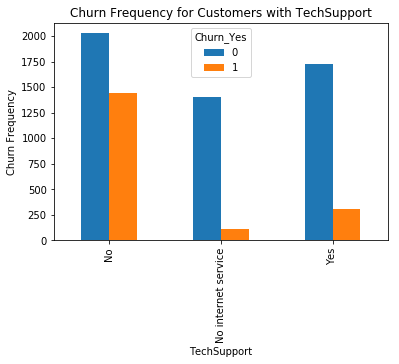

In [27]:
pd.crosstab(telco.TechSupport, telco.Churn_Yes).plot(kind='bar')
plt.title('Churn Frequency for Customers with TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Churn Frequency')
plt.savefig('churn_freq_TechSupport')

In [28]:
telco.groupby('StreamingTV').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
StreamingTV,,,,,,
No,0.184407,24.994304,65.388928,1735.407796,0.664649,0.335351
No internet service,0.034211,30.667763,21.076283,665.220329,0.925658,0.074342
Yes,0.211617,41.126896,88.770829,3762.587236,0.698853,0.301147


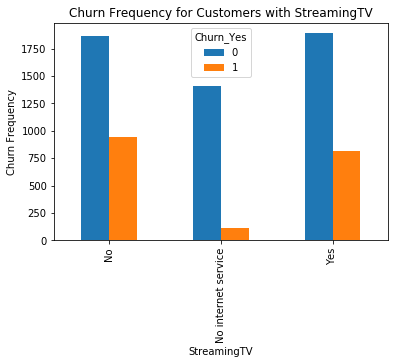

In [29]:
pd.crosstab(telco.StreamingTV, telco.Churn_Yes).plot(kind='bar')
plt.title('Churn Frequency for Customers with StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Churn Frequency')
plt.savefig('churn_freq_StreamingTV')

In [30]:
telco.groupby('StreamingMovies').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
StreamingMovies,,,,,,
No,0.177994,24.747932,65.440579,1715.531967,0.662711,0.337289
No internet service,0.034211,30.667763,21.076283,665.220329,0.925658,0.074342
Yes,0.217869,41.212376,88.478506,3762.042988,0.700476,0.299524


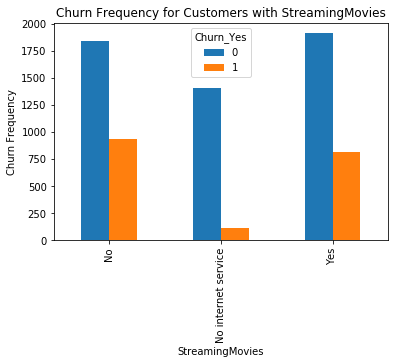

In [31]:
pd.crosstab(telco.StreamingMovies, telco.Churn_Yes).plot(kind='bar')
plt.title('Churn Frequency for Customers with StreamingMovies')
plt.xlabel('StreamingMovies')
plt.ylabel('Churn Frequency')
plt.savefig('churn_freq_StreamingMovies')

In [32]:
telco.groupby('Contract').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
Contract,,,,,,
Month-to-month,0.208258,18.036645,66.398490,1369.254581,0.572903,0.427097
One year,0.129076,42.073370,65.079416,3034.683084,0.887228,0.112772
Two year,0.086053,57.071810,60.872374,3728.933947,0.971513,0.028487


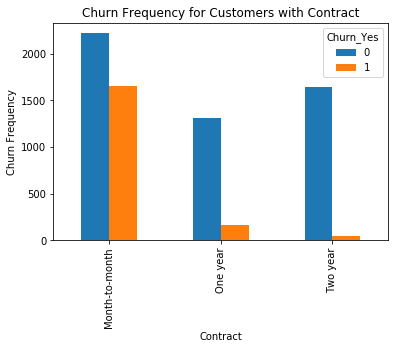

In [33]:
pd.crosstab(telco.Contract, telco.Churn_Yes).plot(kind='bar')
plt.title('Churn Frequency for Customers with Contract')
plt.xlabel('Contract')
plt.ylabel('Churn Frequency')
plt.savefig('churn_freq_Contract')

In [34]:
telco.groupby('PaperlessBilling').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
PaperlessBilling,,,,,,
No,0.092877,32.278980,52.025960,1851.738495,0.836243,0.163757
Yes,0.210173,32.519914,73.574532,2579.843966,0.664107,0.335893


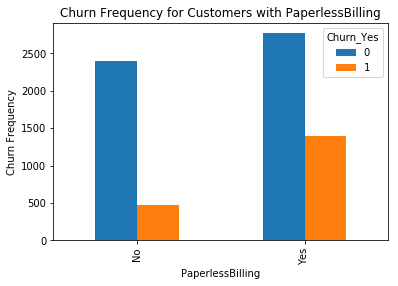

In [35]:
pd.crosstab(telco.PaperlessBilling, telco.Churn_Yes).plot(kind='bar')
plt.title('Churn Frequency for Customers with PaperlessBilling')
plt.xlabel('PaperlessBilling')
plt.ylabel('Churn Frequency')
plt.savefig('churn_freq_PaperlessBilling')

In [36]:
telco.groupby('PaymentMethod').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
PaymentMethod,,,,,,
Bank transfer (automatic),0.151102,43.713359,67.205577,3079.299546,0.832685,0.167315
Credit card (automatic),0.145299,43.297830,66.519264,3071.396022,0.847469,0.152531
Electronic check,0.251163,25.174630,76.255814,2090.868182,0.547146,0.452854
Mailed check,0.058603,21.938903,43.958354,1054.483915,0.807980,0.192020


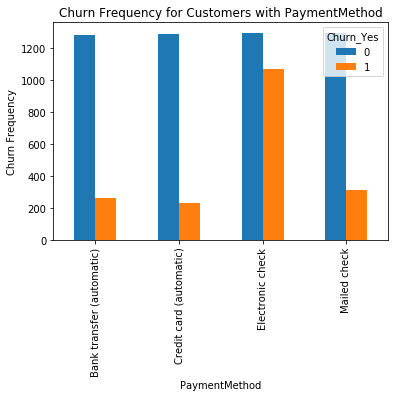

In [37]:
pd.crosstab(telco.PaymentMethod, telco.Churn_Yes).plot(kind='bar')
plt.title('Churn Frequency for Customers with PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Churn Frequency')
plt.savefig('churn_freq_PaymentMethod')

In [38]:
# get dummy variables to categorical columns
#telco = pd.get_dummies(telco, columns = ['Dependents', 'Partner', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen'])
telco = pd.get_dummies(telco, columns = ['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod'])

In [39]:
telco.columns.values

array(['customerID', 'gender', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn_No', 'Churn_Yes', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
     

In [40]:
telco.head()

,customerID,gender,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,1,29.85,29.85,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,Male,34,56.95,1889.50,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,Male,2,53.85,108.15,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,Male,45,42.30,1840.75,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,Female,2,70.70,151.65,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [41]:
# Fitting Logistic Regression
#x = telco.drop(['Churn_Yes', 'Churn_No', 'InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Churn_No', 'customerID', 'gender', 'Dependents_No', 'Partner_No', 'PhoneService_No', 'PaperlessBilling_No', 'SeniorCitizen_0' ], 1)
x = telco.drop(['customerID', 'Churn_No', 'Churn_Yes', 'gender'], 1)
y = telco['Churn_Yes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
# Model Accuracy
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.8018957345971564


In [43]:
# Confusion Matrix to view errors
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1393  162]
 [ 256  299]]


In [44]:
# Compute precision, recall, F-mearue and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1555
          1       0.65      0.54      0.59       555

avg / total       0.79      0.80      0.80      2110

